In [1]:
# 1.a
import numpy as np
import matplotlib.pyplot as plt
import cv2

def video_to_frames(vid_path: str, start_second, end_second):
    
    capture = cv2.VideoCapture(vid_path)
    
    
    #getting fps and initializing frame_set
    frame_set = []
    fps = int(capture.get(cv2.CAP_PROP_FPS))  
    first_frame = start_second*fps
    Last_frame = end_second*fps
    num_of_frames = 1 + (Last_frame-first_frame)
    
    #saving frames to frame_set
    i = 0
    current_frame = 0
    successful = True
    while (successful and i<num_of_frames):
        successful, next_frame = capture.read()
        current_frame+=1
        if (successful and current_frame >= first_frame): 
            frame_set.append(next_frame)
            i += 1
    frame_set = np.array(frame_set) # convert to np array,dimensions (T*fps, H, W, C)
    capture.release()
    return frame_set
        
        

(1, 360, 640, 3)


(-11.0, 231.0, 0.0, 7519.05)

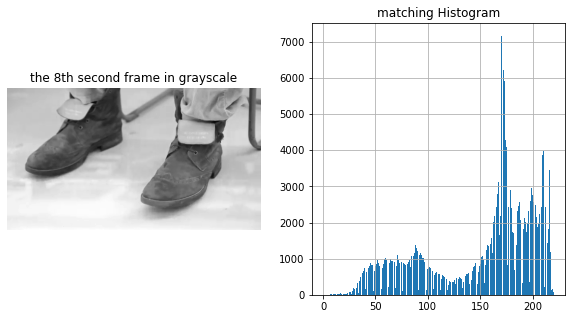

In [2]:
desired_frame = video_to_frames("../given_data/MilkyChance_StolenDance.mp4", 8, 8)
print(desired_frame.shape)
gray_frame = cv2.cvtColor(desired_frame[0], cv2.COLOR_BGR2GRAY)
figure = plt.figure(figsize=(10, 5))
frame = figure.add_subplot(1, 2, 1)
frame.set_title("the 8th second frame in grayscale")
frame.imshow(gray_frame, cmap="gray")
plt.axis("off")

hist = figure.add_subplot(1, 2, 2)
hist.hist(gray_frame.flatten(), 256)
hist.set_title("matching Histogram")
hist.grid()
plt.axis("on")


In [22]:
# 1.b
def gamma_correction(img, gamma):
    scaled_img = img/255;
    gamma_img = (255*(scaled_img**gamma)).round();
    return gamma_img;

(-10.200000000000001, 214.2, 0.0, 7519.05)

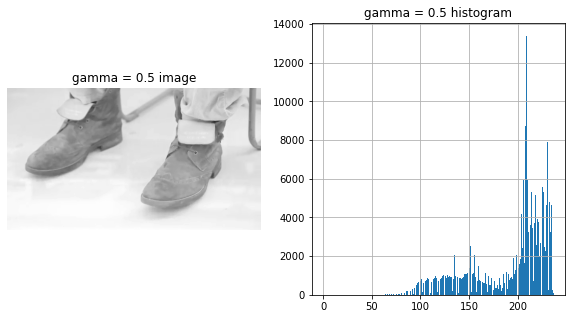

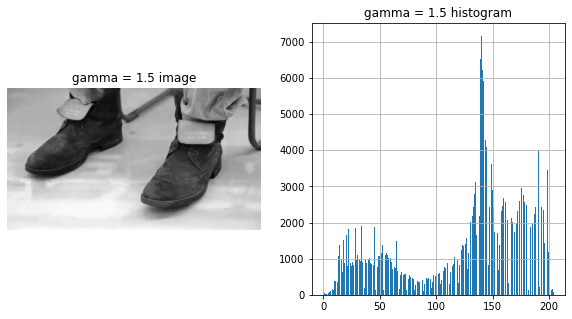

In [28]:
img1 = gamma_correction(gray_frame, 0.5)
figure_2 = plt.figure(figsize=(10, 5))
img1_frame = figure_2.add_subplot(1, 2, 1)
img1_frame.set_title("gamma = 0.5 image")
img1_frame.imshow(img1, cmap="gray")
plt.axis("off")

hist1 = figure_2.add_subplot(1, 2, 2)
hist1.hist(img1.flatten(), 256)
hist1.set_title("gamma = 0.5 histogram")
hist1.grid()
plt.axis("on")

img2 = gamma_correction(gray_frame, 1.5)
figure_3 = plt.figure(figsize=(10, 5))
img2_frame = figure_3.add_subplot(1, 2, 1)
img2_frame.set_title("gamma = 1.5 image")
img2_frame.imshow(img2, cmap="gray")
plt.axis("off")

hist2 = figure_3.add_subplot(1, 2, 2)
hist2.hist(img2.flatten(), 256)
hist2.set_title("gamma = 1.5 histogram")
hist2.grid()
plt.axis("on")


(-0.5, 639.5, 359.5, -0.5)

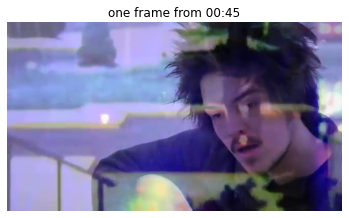

In [44]:
# 1.c
frame_c = video_to_frames('../given_data/MilkyChance_StolenDance.mp4', 45, 45)
RGB_frame_c = cv2.cvtColor(frame_c[0], cv2.COLOR_BGR2RGB)
figure_4 = plt.figure()
colored_img = figure_4.add_subplot(1, 1, 1)
colored_img.set_title("one frame from 00:45")
colored_img.imshow(RGB_frame_c)
plt.axis("off")


In [39]:
# 1.d
# adding needed functions.
def frames_mean(frame_set):
    mean_frame = np.mean(frame_set, axis=0).astype('uint8')
    return mean_frame
def frames_median(frame_set):
    median_frame = np.median(frame_set, axis=0).astype('uint8')
    return median_frame


(-0.5, 639.5, 359.5, -0.5)

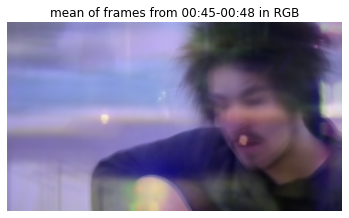

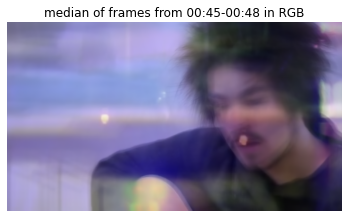

In [43]:
frame_set = video_to_frames('../given_data/MilkyChance_StolenDance.mp4', 45, 48)

frame_set_mean=frames_mean(frame_set)
RGB_frame_mean = cv2.cvtColor(frame_set_mean, cv2.COLOR_BGR2RGB)

figure_5 = plt.figure()
mean_img = figure_5.add_subplot(1, 1, 1)
mean_img.set_title("mean of frames from 00:45-00:48 in RGB")
mean_img.imshow(RGB_frame_mean)
plt.axis("off")


frame_set_median=frames_median(frame_set)
RGB_frame_median = cv2.cvtColor(frame_set_mean, cv2.COLOR_BGR2RGB)

figure_6 = plt.figure()
median_img = figure_6.add_subplot(1, 1, 1)
median_img.set_title("median of frames from 00:45-00:48 in RGB")
median_img.imshow(RGB_frame_median)
plt.axis("off")